In [49]:
import os
import os.path
import glob
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

plt.rcParams['figure.figsize'] = (5, 5)

In [50]:
def binarize(image):
    return 0 * (image < 128) + 1 * (image >= 128)

In [51]:
def difference(path1, path2, list1, list2):
    flag = 0
    for i in range(len(originals)):
        image1 = binarize(plt.imread(path1 + list1[i]))
        image2 = binarize(plt.imread(path2 + list2[i]))
        if sum(sum(image1 - image2)):
            flag = 1
            print(i)
    if flag:
        return False
    else:  
        return True

### Check one pair of images

In [37]:
org_path = '/Users/vladarozova/Dropbox/New experiment/Images/tiff/Cytosoft 2 kPa/Combination B/'
res_path = '/Users/vladarozova/Dropbox/New experiment/Analysis/cell-profiler/cellmasks/'

originals = ['A1-5-WGA-mask.tif']
results = ['cellmasks_39.jpeg']

In [38]:
print(difference(org_path, res_path, originals, results))

0
False


In [39]:
N = 0
original = binarize(plt.imread(org_path + originals[N]))
result = binarize(plt.imread(res_path + results[N]))

In [40]:
diff = original - result
x, y = diff.nonzero()
x, y

(array([280, 280, 280, ..., 489, 489, 489]),
 array([ 62,  63,  64, ..., 369, 370, 371]))

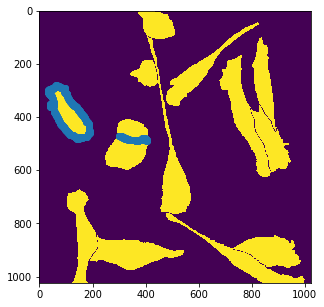

In [41]:
# Plot the original
plt.imshow(original); 
plt.scatter(y, x);

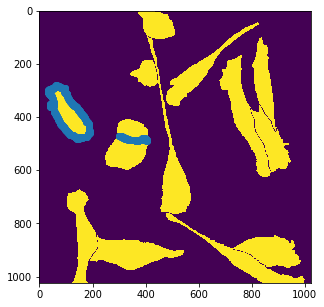

In [43]:
# Plot cell profiler output
plt.imshow(result);
plt.scatter(y, x);

### Load Cell Profiler results

In [52]:
# Path to cell profiler results
res_path = '/Users/vladarozova/Dropbox/New experiment/Analysis/cell-profiler/cellmasks/'

# List of Cell Profiler results
os.chdir(res_path)
results = glob.glob('*.jpeg')

# Sort the list
results.sort()

### Compare the results against the originals

In [53]:
stiffness = ["0.2", "0.5", "16", "2", "32", "64", "8"]

n0 = 0

for s in stiffness:
    originals = []
    
    org_path = '/Users/vladarozova/Dropbox/New experiment/Images/tiff/Cytosoft ' + s + ' kPa/Combination B/'
    
    # List of original masks
    os.chdir(org_path)
    originals = glob.glob('*WGA-mask.tif')
    
    # Sort the list
    originals.sort()
    
    # Number of images
    n = len(originals)
    
    if difference(org_path, res_path, originals, results[n0 : n0 + n]):
        print("Stiffness {} kPa. All the images are pairwise equal.".format(s))
    else:
        print("Check the masks!") 
        
    
    n0 = n0 + n

Stiffness 0.2 kPa. All the images are pairwise equal.
Stiffness 0.5 kPa. All the images are pairwise equal.
Stiffness 16 kPa. All the images are pairwise equal.
Stiffness 2 kPa. All the images are pairwise equal.
Stiffness 32 kPa. All the images are pairwise equal.
Stiffness 64 kPa. All the images are pairwise equal.
Stiffness 8 kPa. All the images are pairwise equal.


### Check the pairs that are not equal

In [ ]:
N = 4
print(org_list[N])
print(res_list[N])

original = binarize(plt.imread(org_path + org_list[N]))
result = binarize(plt.imread(res_path + res_list[N]))

In [ ]:
diff = original - result
x, y = diff.nonzero()
x, y

In [ ]:
# Plot the original
plt.imshow(original); 
plt.scatter(y, x);

In [ ]:
# Plot cell profiler output
plt.imshow(result);
plt.scatter(y, x);

In [ ]:
print(diff.sum())
plt.imshow(diff);
plt.scatter(y, x);

In [ ]:
original[x, y]

In [ ]:
result[x, y]

In [ ]:
x_lower = x.min() - 5
x_upper = x.max() + 5
y_lower = y.min() - 5
y_upper = y.max() + 5

In [ ]:
plt.imshow(original[x_lower : x_upper, y_lower : y_upper]);

In [ ]:
plt.imshow(result[x_lower : x_upper, y_lower : y_upper]);

In [ ]:
plt.imshow(diff[x_lower : x_upper, y_lower : y_upper]);